# Interacting with an API using Python

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

In [2]:
import os
import requests
import time
import sqlite3

In [3]:
# Load the .env file variables
load_dotenv();

In [4]:
# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [6]:
artist_id = '1dfeR4HaWDbWqFHLkxsg1d'

In [7]:
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
results = spotify.artist_top_tracks(artist_id)

In [8]:
songs = []
popularity = []
duration   = []

for track in results['tracks']:
    songs.append(track['name'])
    popularity.append(track['popularity'])
    duration.append(round(track['duration_ms']/(1000*60)%60, 2))

In [9]:
df = pd.DataFrame()

df['Song'] = songs
df['Popularity'] = popularity
df['Duration'] = duration

In [10]:
df

,Song,Popularity,Duration
0,Bohemian Rhapsody - Remastered 2011,75,5.91
1,Don't Stop Me Now - Remastered 2011,77,3.49
2,Under Pressure - Remastered 2011,76,4.14
3,Another One Bites The Dust - Remastered 2011,76,3.58
4,We Will Rock You - Remastered 2011,71,2.03
5,Crazy Little Thing Called Love - Remastered 2011,71,2.72
6,Somebody To Love - Remastered 2011,72,4.94
7,Killer Queen - Remastered 2011,71,2.99
8,Radio Ga Ga - Remastered 2011,67,5.80
9,We Are The Champions - Remastered 2011,67,2.99


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Song        10 non-null     object 
 1   Popularity  10 non-null     int64  
 2   Duration    10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.0+ bytes


In [12]:
df = df.sort_values(by="Popularity", ascending=False).reset_index(drop=True)
df

,Song,Popularity,Duration
0,Don't Stop Me Now - Remastered 2011,77,3.49
1,Under Pressure - Remastered 2011,76,4.14
2,Another One Bites The Dust - Remastered 2011,76,3.58
3,Bohemian Rhapsody - Remastered 2011,75,5.91
4,Somebody To Love - Remastered 2011,72,4.94
5,We Will Rock You - Remastered 2011,71,2.03
6,Crazy Little Thing Called Love - Remastered 2011,71,2.72
7,Killer Queen - Remastered 2011,71,2.99
8,Radio Ga Ga - Remastered 2011,67,5.80
9,We Are The Champions - Remastered 2011,67,2.99


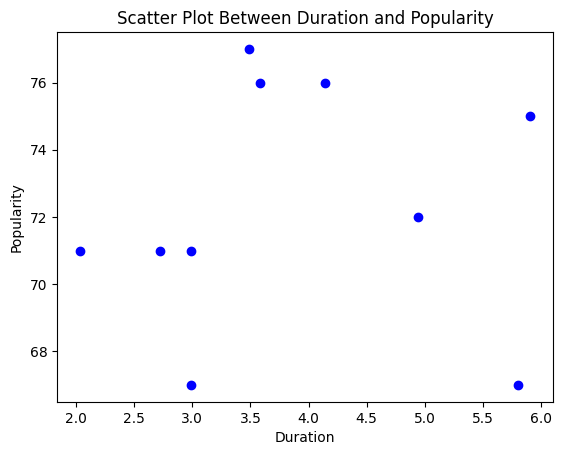

In [13]:
# Data
x = df['Duration']
y = df['Popularity']
# Create the scatter plot
plt.scatter(x, y, marker="o", color="blue")
# Customize the chart
plt.title("Scatter Plot Between Duration and Popularity")
plt.xlabel("Duration")
plt.ylabel("Popularity")
# Display the chart
plt.show()

In [22]:
print('As can be seen, there is no direct relationship between the length of the song and its popularity.')

As can be seen, there is no direct relationship between the length of the song and its popularity.


In [14]:
database_name = 'spotify.db'

In [15]:
conn = sqlite3.connect(database_name)

In [16]:
table_name = 'most_streamed_songs'

In [17]:
df.to_sql(table_name, conn, if_exists='replace', index=False);

In [18]:
cursor = conn.cursor()

In [19]:
pulled_data = cursor.execute('SELECT * FROM most_streamed_songs')

In [20]:
conn.commit()

In [21]:
for row in pulled_data:
    print(f"Song = {row[0]}, Popularity = {row[1]}, Duration = {row[2]}")

Song = Don't Stop Me Now - Remastered 2011, Popularity = 77, Duration = 3.49
Song = Under Pressure - Remastered 2011, Popularity = 76, Duration = 4.14
Song = Another One Bites The Dust - Remastered 2011, Popularity = 76, Duration = 3.58
Song = Bohemian Rhapsody - Remastered 2011, Popularity = 75, Duration = 5.91
Song = Somebody To Love - Remastered 2011, Popularity = 72, Duration = 4.94
Song = We Will Rock You - Remastered 2011, Popularity = 71, Duration = 2.03
Song = Crazy Little Thing Called Love - Remastered 2011, Popularity = 71, Duration = 2.72
Song = Killer Queen - Remastered 2011, Popularity = 71, Duration = 2.99
Song = Radio Ga Ga - Remastered 2011, Popularity = 67, Duration = 5.8
Song = We Are The Champions - Remastered 2011, Popularity = 67, Duration = 2.99
